# Object: First Observation
## Goal
Show on a simple example the capacities of Obs tools

------

In [1]:
# This cell is only to prepare data for the example
import json, folium
with open('departements-version-simplifiee.geojson') as f: dp = f.read()
#os.chdir('../../ES')
from observation import Observation as obs
from pprint import pprint

paris       = [2.35, 48.87]
lyon        = [4.83, 45.76]
marseille   = [5.38, 43.3]
dpt = json.loads(dp)['features']
pol13 = {dpt[12]['properties']['code'] + ' ' + dpt[12]['properties']['nom'] : dpt[12]['geometry']['coordinates']}
pol69 = {dpt[69]['properties']['code'] + ' ' + dpt[69]['properties']['nom'] : dpt[69]['geometry']['coordinates']}
pol75 = {dpt[75]['properties']['code'] + ' ' + dpt[75]['properties']['nom'] : dpt[75]['geometry']['coordinates']}

## Observation
An observation is a set of results in response to the questions: when, where, what, how much.
The most simple and complete Observation you can create is for example :

In [2]:
ob = obs.std('high', 'morning', 'paris', ' Temp')

# This Observation can be supplemented by other results :
ob.append(['low', 'morning', 'lyon', ' Temp'])
ob.append(['very high', 'morning', 'marseille', ' Temp'])

[2, 0, 2, 0]


We can see this Observation in different ways : 
 - The "view" shows you a list with all the informations (eg CSV file).
 - The "voxel" represent the quantity of data for each axe ( 1 for Datation, 3 for Location, 1 for Property).
 - The "json" is a the representation of the data in the JSON format.


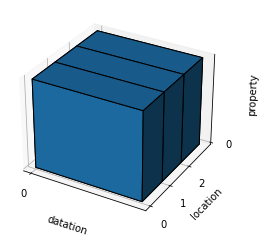

{'data': [['result', ['high', 'low', 'very high']],
          ['datation', ['morning']],
          ['location', ['paris', 'lyon', 'marseille'], 0],
          ['property', [' Temp']]],
 'type': 'observation'}


result,datation,location,property
"""high""","""morning""","""paris""",""" Temp"""
"""low""","""morning""","""lyon""",""" Temp"""
"""very high""","""morning""","""marseille""",""" Temp"""


In [3]:
ob.voxel(idxname=['datation', 'location', 'property'], varname='result')
pprint(ob.json())
ob.view(tablefmt='html', numalign='center', stralign='center')

The String values can be changed to numerical values. It allows to use plotting functions

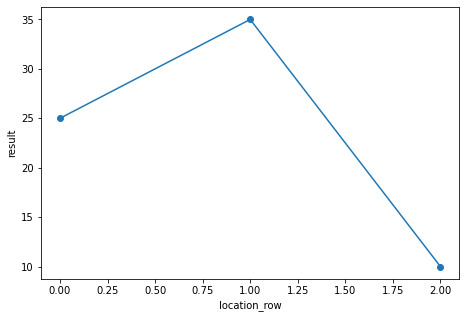

{'location': ['"paris"', '"lyon"', '"marseille"']}

In [4]:
ob.nindex('result').setlistvalue([25, 10, 35])
ob.plot(idxname=['datation', 'location', 'property'], varname='result')

Similarly if we complete the alphanumeric Location values with geographic coordinates, we can visualize the data 
on a map with position ...

In [5]:
print(ob.nindex('location'))
ob.nindex('location').setlistvalue([paris, lyon, marseille], valueonly=True) # ie paris = [2.35, 48.87]
ob.view()
display(ob.choropleth())
ob.view(tablefmt='html', numalign='center', stralign='center')

    ["location", ["paris", "lyon", "marseille"]]



result,datation,location,property
25,"""morning""","{""paris"": [2.35, 48.87]}",""" Temp"""
10,"""morning""","{""lyon"": [4.83, 45.76]}",""" Temp"""
35,"""morning""","{""marseille"": [5.38, 43.3]}",""" Temp"""


... or with polygon if the area is large

In [6]:
print(ob.nindex('location'))
ob.nindex('location').setlistvalue([pol75, pol69, pol13],  valueonly=True) # ie pol75 = {'75 Paris': [[[2.416, 48.849]....      
display(ob.choropleth())

    ["location", [{"paris": [2.35, 48.87]}, {"lyon": [4.83, 45.76]}, {"marseille": [5.38, 43.3]}]]



We now add some more Results with a new Property (Humidity) :

In [7]:
morning = ob.setDatation[0]
locparis, loclyon, locmarseille = ob.setLocation
ob.append([30, morning, locparis, 'Humidity'])
ob.append(['60', morning, locmarseille, 'Humidity'])


[4, 0, 2, 1]

In the several views, we see that the values are now distributed along two dimensions (Location, Property). 

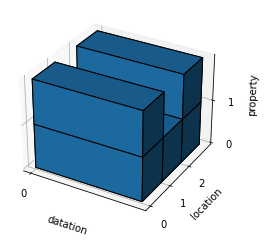

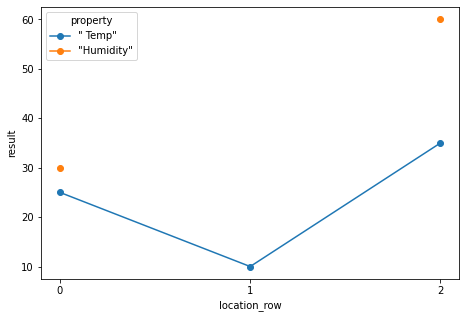

result,datation,name-location,property
25,"""morning""",paris,""" Temp"""
10,"""morning""",lyon,""" Temp"""
35,"""morning""",marseille,""" Temp"""
30,"""morning""",paris,"""Humidity"""
"""60""","""morning""",marseille,"""Humidity"""


In [8]:
ob.voxel(idxname=['datation', 'location', 'property'])
ob.plot(idxname=['location', 'property', 'datation'], varname='result')
ob.view(location='n', width=40, tablefmt='html', numalign='center', stralign='center')

## Keep adding data !! 

We add now Result with a new Datation and we put the old Location values back (to keep data simple).
For the Datation value, we add a timestamp.

In [9]:
ob.append([28, 'afternoon', locparis, ' Temp'])
ob.append([15, 'afternoon', loclyon, ' Temp'])
ob.nindex('location').setcodeclist([paris, lyon, marseille], valueonly=True)

The values are distributed along the three Dimension and the representations evolve to take the dimension 
into account.

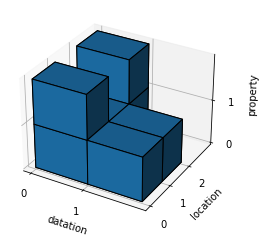

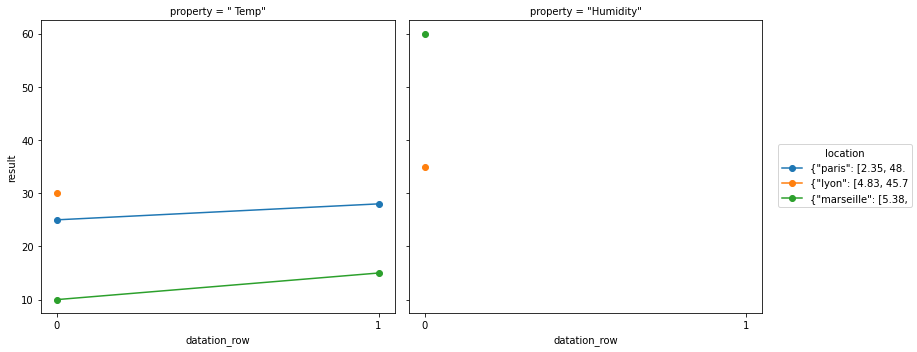

result,name-datation,name-location,name-property
25,morning,paris,Temp
10,morning,lyon,Temp
35,morning,marseille,Temp
30,morning,paris,Humidity
"""60""",morning,marseille,Humidity
28,afternoon,paris,Temp
15,afternoon,lyon,Temp


In [10]:
ob.nindex('datation').setcodeclist(["2021-05-05T10", "2021-05-05T16"], valueonly=True)
ob.voxel(idxname=['datation', 'location', 'property'])
ob.plot(idxname=['datation', 'property', 'location'], varname='result')
ob.view(width=15, location='n', datation='n', property='n', tablefmt='html', numalign='center', stralign='center')

To end this Observation, we can now add some general information: 
- a name: 'first observation' 
- some parameters: attribute 'param'

In [11]:
ob.name = 'first observation'
ob.param = {'category': 'example', 
            'date':'01/10/2022',
            'link': 'https://github.com/loco-philippe/Environmental-Sensing/blob/main/python/Examples/'
            'Observation/first_observation.ipynb'}

Finally, we show you a new representation of the data with a Xarray : a 3D Matrix for the Result and some index 
for Location, Datation and Property. Xarray is very powerful to analyze and process this kind of data.

You will notice that the data has been completed with nan values to fill in the matrix.

In [12]:
ob.to_xarray(numeric=True, idxname=['datation', 'location', 'property'])

<xarray.DataArray 'first observation' (datation: 2, location: 3, property: 2)>
array([[[25., 30.],
        [10., nan],
        [35., 60.]],

       [[28., nan],
        [15., nan],
        [nan, nan]]])
Coordinates:
  * datation  (datation) object {"morning": "2021-05-05T10:00:00+00:00"} {"af...
  * location  (location) object {"paris": [2.35, 48.87]} ... {"marseille": [5...
  * property  (property) object " Temp" "Humidity"
Attributes:
    category:  example
    date:      01/10/2022
    link:      https://github.com/loco-philippe/Environmental-Sensing/blob/ma...

------
# Conclusion
Here is a summary in terms of data : 
- the JSON show you all the data we define (in a very compact structure).
- the 'information' dictionnary presents the main informations associated to the Observation with in particular :
    * the boundingbox for the Location value
    * the timebox for the Datation value (an equivalent of the boundingbox for the dates)
    * a 'complet' boolean to indicate if the matrix is full or not
    * the 'measureRate' (ratio between the measure number and the complete number : 7 / 12 in the example)
    * the dimension of the Observation (1, 2 or 3)
    * the axes that make up the dimension.
    
*Note: If you are very careful, you will notice that there is a problem with the Result values in the JSON 
because we don't know how to match a Result value to a Datation value, a Property value and a Location value
and you are right !!*

*This point is clarified in the Json example.*

In [13]:
ob.full(varname='result', idxname=['datation', 'property', 'location'])
ob.setcanonorder()
pprint(ob.json(modecodec='optimize', json_info=True), indent=2, width=100)

{ 'data': [ [ 'datation',
              [ {'morning': datetime.datetime(2021, 5, 5, 10, 0, tzinfo=datetime.timezone.utc)},
                {'afternoon': datetime.datetime(2021, 5, 5, 16, 0, tzinfo=datetime.timezone.utc)}]],
            [ 'location',
              [{'paris': [2.35, 48.87]}, {'lyon': [4.83, 45.76]}, {'marseille': [5.38, 43.3]}]],
            ['property', [' Temp', 'Humidity']],
            ['result', [25, 30, 10, '-', 35, '60', 28, '-', 15, '-', '-', '-']]],
  'information': { 'index': { 'datation': { 'box': [ datetime.datetime(2021, 5, 5, 10, 0, tzinfo=datetime.timezone.utc),
                                                     datetime.datetime(2021, 5, 5, 16, 0, tzinfo=datetime.timezone.utc)],
                                            'lencodec': 2,
                                            'num': 0,
                                            'typevalue': 'DatationValue'},
                              'location': { 'box': [2.35, 43.3, 5.38, 48.87],
             